1. Bootstrapping- Resampling technique that generates many sample datasets by repeatedly sampling your data.  We use the bootstrapping method if we don't have enough data, we simply just insert a copy of the previous data, repeat until there is enough data.

2. Advantages: fills the sample
   Disadvantages: does not give any new data, you are just reusing the same data
   
3. Bootstrap uses replacement while cross validation does not change any of the data, bootstrapping can create multiple data sets from the original data and choose, while cross validation recreates the same exact data and choose different training and testing data

4. Ensamble learning uses multiple learning algorithms to create better regression models.  Bagging or bootstrapping is reusing data from the original samples.  Bootstrapping is used when there isn't enough data in the data sets

5. Support vector machines, Decision trees, regression, neural networks and K-means are some classification techniques.  Random forests can use bootstrapping and extra trees to help create multiple decision trees.  It uses regression to predict the outcome.  Bagging or bootstrapping can be used in random forests to create the next tree.  Extra trees are trained data using the learning sample (not the bootstrap sample) to split the trees and use the data of the highest scoring sample.  Since random forest is comprised of decision trees, it will have the properties of decison trees, which is having the ability to transverse through the tree based on your decisons.

6. Advantages: does both classification and regression, can handle large amounts of data, good regression usages, can balance errors, can detect the data (if its a outlier etc.), uses bootstrapping so you don't need a test set

   Disadvantages: cannot predict the regression beyond the training data and may overfit, it is very random so it is very hard to get the results you want as any randomness will change the output
   
7. Subset selection methods are Filter and Wrapper methods, filter- measure the importance of the features by their relationships to the dependent variable, wrapper- measure the usefulness of a subset by training a model on it

subset selection is when you select the features of the data that you want and only use that data for your dataset/model, cross validation splits the data into k groups and select different training and testing per group/set

ex. a data set of 12 features, in subset selection, you can select any of the features and only use the data from those features, lets name the features 1-12 if only the first 6 datas are relevent to your graph, then you can just select 1,2,3,4,5,6 or you can skip around 1,4,6,8,5,3, the order does not matter, however in cross validation, you will choose the k which will determine how many groups of data will be created.  lets say the k is 4 then 4 groups of data will be created within the each group of data, every single data is present and will be split differently between training and testing data.  Group 1 will have a different split, so does group 2, no 2 groups will have the same split.


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('random_forest_data.csv')

In [3]:
df.head()

,Unnamed: 0,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0,0.40000,https://api.spotify.com/v1/audio-analysis/3AEZ...,0.761,222560,0.838,3AEZUABDXNtecAOSC1qTfo,0.000000,4,0.176,-3.073,0,0.0502,93.974,4,https://api.spotify.com/v1/tracks/3AEZUABDXNte...,audio_features,spotify:track:3AEZUABDXNtecAOSC1qTfo,0.710
1,1,0.18700,https://api.spotify.com/v1/audio-analysis/6mIC...,0.852,195840,0.773,6mICuAdrwEjh6Y6lroV2Kg,0.000030,8,0.159,-2.921,0,0.0776,102.034,4,https://api.spotify.com/v1/tracks/6mICuAdrwEjh...,audio_features,spotify:track:6mICuAdrwEjh6Y6lroV2Kg,0.907
2,2,0.05590,https://api.spotify.com/v1/audio-analysis/3QwB...,0.832,209453,0.772,3QwBODjSEzelZyVjxPOHdq,0.000486,10,0.440,-5.429,1,0.1000,96.016,4,https://api.spotify.com/v1/tracks/3QwBODjSEzel...,audio_features,spotify:track:3QwBODjSEzelZyVjxPOHdq,0.704
3,3,0.00431,https://api.spotify.com/v1/audio-analysis/7DM4...,0.663,259196,0.920,7DM4BPaS7uofFul3ywMe46,0.000017,11,0.101,-4.070,0,0.2260,99.935,4,https://api.spotify.com/v1/tracks/7DM4BPaS7uof...,audio_features,spotify:track:7DM4BPaS7uofFul3ywMe46,0.533
4,4,0.55100,https://api.spotify.com/v1/audio-analysis/6rQS...,0.508,205600,0.687,6rQSrBHf7HlZjtcMZ4S4bO,0.000003,0,0.126,-4.361,1,0.3260,180.044,4,https://api.spotify.com/v1/tracks/6rQSrBHf7HlZ...,audio_features,spotify:track:6rQSrBHf7HlZjtcMZ4S4bO,0.555


In [4]:
df.columns

Index(['Unnamed: 0', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'id', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri', 'valence'],
      dtype='object')

In [5]:
df = df.drop({'analysis_url', 'id','Unnamed: 0','track_href','type', 'uri'},axis = 1)

In [6]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.40000,0.761,222560,0.838,0.000000,4,0.176,-3.073,0,0.0502,93.974,4,0.710
1,0.18700,0.852,195840,0.773,0.000030,8,0.159,-2.921,0,0.0776,102.034,4,0.907
2,0.05590,0.832,209453,0.772,0.000486,10,0.440,-5.429,1,0.1000,96.016,4,0.704
3,0.00431,0.663,259196,0.920,0.000017,11,0.101,-4.070,0,0.2260,99.935,4,0.533
4,0.55100,0.508,205600,0.687,0.000003,0,0.126,-4.361,1,0.3260,180.044,4,0.555


In [7]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [8]:
x = df[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature']]
y = df['valence']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [9]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=15, random_state=2)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [10]:
y_pred=regressor.predict(x_test)

In [11]:
score = regressor.score(x_test,y_test)

In [12]:
regressor.predict([[0.55100,0.508,205600,0.687,0.000003,0,0.126,-4.361,1,0.3260,180.044,4]])

array([0.555])

In [13]:
feature_imp = pd.Series(regressor.feature_importances_,index= x.columns).sort_values(ascending=False)
feature_imp

energy              0.267991
danceability        0.223445
tempo               0.108127
acousticness        0.106295
speechiness         0.072773
duration_ms         0.070857
loudness            0.051486
liveness            0.045291
instrumentalness    0.031478
key                 0.015061
mode                0.007082
time_signature      0.000114
dtype: float64

No handles with labels found to put in legend.


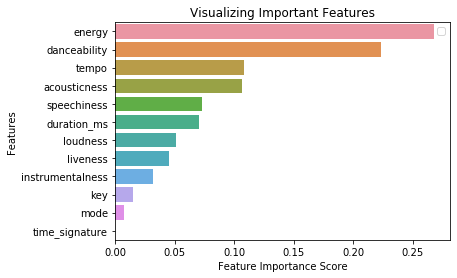

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
print('Accuracy: ',score) #with a test size of .3

Accuracy:  0.9959087727457138


In [16]:
#this graph tells us how important each feature is towards the valence ranking from top to bottom

In [17]:
x_cv, x_test, y_cv, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=10)

In [18]:
regressor.fit(x_cv, y_cv)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=15,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

In [19]:
y_pred=regressor.predict(x_cv)
score2 = regressor.score(x_cv,y_cv)

In [20]:
print('Accuracy: ',score2) #with a test size of .5

Accuracy:  0.9976266882152395


In [21]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [22]:
X = x

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [24]:
cv = KFold(n_splits=20, random_state=9, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    print("Accuracy: ",regressor.score(X[train_index],y[train_index]))

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]

Train Index:  [ 3790  3791  3792 ... 75797 75798 75799] 

Test Index:  [   0    1    2 ... 3787 3788 3789]
Accuracy:  0.1401290806104254
Train Index:  [    0     1     2 ... 75797 75798 75799] 

Test Index:  [3790 3791 3792 ... 7577 7578 7579]
Accuracy:  0.14142250600874595
Train Index:  [    0     1     2 ... 75797 75798 75799] 

Test Index:  [ 7580  7581  7582 ... 11367 11368 11369]
Accuracy:  0.14017377617778193
Train Index:  [    0     1     2 ... 75797 75798 75799] 

Test Index:  [11370 11371 11372 ... 15157 15158 15159]
Accuracy:  0.1385104626389504
Train Index:  [    0     1     2 ... 75797 75798 75799] 

Test Index:  [15160 15161 15162 ... 18947 18948 18949]
Accuracy:  0.1401037819119939
Train Index:  [    0     1     2 ... 75797 75798 75799] 

Test Index:  [18950 18951 18952 ... 22737 22738 22739]
Accuracy:  0.1394982567656602
Train Index:  [    0     1     2 ... 75797 75798 75799] 

Test Index:  [22740 22741 22742 ... 26527 26528 26529]
Accuracy:  0.1415671751174301
Train Ind

In [ ]:
#The best model is the one in the middle